# Exercise sheet 3

## Task 4.1

Prove the following identity
$$
\begin{align}
\frac{1}{\sqrt{2}}\left[\left|\psi^*\psi\right>+\left|\psi_{\bot}^*\psi_{\bot}\right>\right]=\frac{1}{\sqrt{2}}\left[\left|00\right>+\left|11\right>\right]
\end{align}
$$

Proof: Using $\alpha_0\alpha_0^*+\alpha_1\alpha_1^*=\left|\alpha_0\right|^2+\left|\alpha_1\right|^2=1$
$$
\begin{align}
\left|\psi^*\psi\right>=\left(\alpha_0\left|0\right>+\alpha_1\left|1\right>\right)\otimes\left(\alpha_0^*\left|0\right>+\alpha_1^*\left|1\right>\right)&=\alpha_0\alpha_0^*\left|00\right>+\alpha_0\alpha_1^*\left|01\right>+\alpha_0^*\alpha_1\left|10\right>+\alpha_1\alpha_1^*\left|11\right> \\
\left|\psi_{\bot}^*\psi_{\bot}\right>=\left(\alpha_1^*\left|0\right>-\alpha_0^*\left|1\right>\right)\otimes\left(\alpha_1\left|0\right>-\alpha_0\left|1\right>\right)&=\alpha_1\alpha_1^*\left|00\right>-\alpha_0\alpha_1^*\left|01\right>-\alpha_0^*\alpha_1\left|10\right>+\alpha_0\alpha_0^*\left|11\right> \\
\Rightarrow \left|\psi^*\psi\right>+\left|\psi_{\bot}^*\psi_{\bot}\right>&=\left(\alpha_0\alpha_0^*+\alpha_1\alpha_1^*\right)\left|00\right>+\left(\alpha_1\alpha_1^*+\alpha_0\alpha_0^*\right)\left|11\right> \\
&=\left|00\right>+\left|11\right>
\end{align}
$$

## Task 4.2

An $O(n)$ algorithm for finding the string $s$ is given looking at the $n$ binary vectors $e_1,\dots,e_n$ where $e_i$ has a $1$ at the $i$-th position and $0$s elsewhere.

We can then consider the inner products $e_i \cdot s=s_i=f(e_i)$. Hence, $s$ is given by $s=\left(f(e_1),\dots,f(e_n)\right)$.

We can thus deduce from the given table that $s=\left(0,0,1,1\right)$.

Simple numpy implementation

In [36]:
import numpy as np

def deduce_s(f, n=4):
    s = np.zeros(n)
    for i in range(n):
        e_i = np.zeros(n)
        e_i[i] = 1
        s[i] = f(e_i)
    return s

In [38]:
def f_s(x):
    s = np.array([0, 0, 1, 1])
    return s @ x
deduce_s(f_s, n)

array([0., 0., 1., 1.])

## Task 4.3

Standard imports

In [22]:
from qiskit import Aer, transpile
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.visualization import plot_histogram

Defining quantum circuit

In [81]:
opUf = QuantumCircuit(6, name=r'$U_f$')
opUf.cx(0, 4)
opUf.cx(1, 4)
opUf.cx(4, 5)
opUf.cx(1, 4)
opUf.cx(0, 4)

Draw the operator

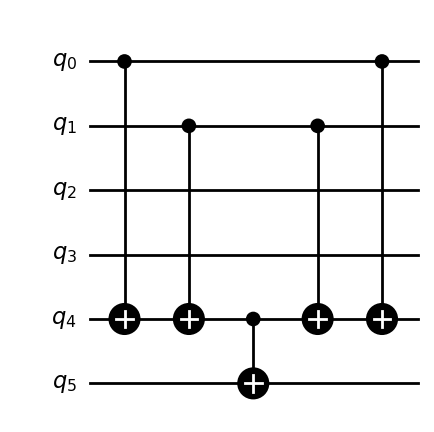

In [82]:
opUf.draw('mpl', style='bw')

Helper function for running with simulator

In [83]:
simulator = Aer.get_backend('aer_simulator')
def runCircuit(circ, shots=10_000):
    transp = transpile(circ, simulator)
    IBMjob = simulator.run(transp, shots=shots)
    result = IBMjob.result()
    counts = result.get_counts(transp)
    return counts

Run for all binary inputs $x\in\{0,1\}^4$

In [84]:
for x_4 in [0, 1]:
    for x_3 in [0, 1]:
        for x_2 in [0, 1]:
            for x_1 in [0, 1]:
                circ_Uf = QuantumCircuit(6, 1)
                if x_1 == 1:
                    circ_Uf.x(0)
                if x_2 == 1:
                    circ_Uf.x(1)
                if x_3 == 1:
                    circ_Uf.x(2)
                if x_4 == 1:
                    circ_Uf.x(3)
                circ_Uf.append(opUf, qargs=[i for i in range(6)])
                circ_Uf.measure(5, 0)
                
                counts = runCircuit(circ_Uf)
                print(f'{x_4}{x_3}{x_2}{x_1}', counts)

0000 {'0': 10000}
0001 {'1': 10000}
0010 {'1': 10000}
0011 {'0': 10000}
0100 {'0': 10000}
0101 {'1': 10000}
0110 {'1': 10000}
0111 {'0': 10000}
1000 {'0': 10000}
1001 {'1': 10000}
1010 {'1': 10000}
1011 {'0': 10000}
1100 {'0': 10000}
1101 {'1': 10000}
1110 {'1': 10000}
1111 {'0': 10000}


Always coincides with table of $f$

## Task 4.4

Implementing Bernstein-Vazirani algorithm

In [85]:
circ = QuantumCircuit(6, 4)
output_qubits = [i for i in range(4)]

Put auxiliary qubit in state $\left|-\right>$ and apply Hadamard wall to the rest

In [86]:
circ.x(5)
circ.h(5)

circ.h(output_qubits)
# Apply barrier 

Apply inner-product oracle

In [87]:
circ.append(opUf, qargs=[i for i in range(6)])

Another Hadamard wall and add measurement

In [88]:
circ.h(output_qubits)
circ.measure(output_qubits, output_qubits)

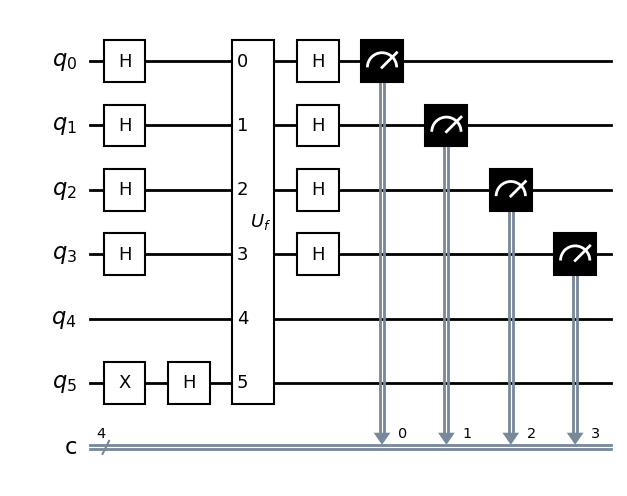

In [89]:
circ.draw('mpl', style='bw', plot_barriers=True, fold=-4)

Run circuit

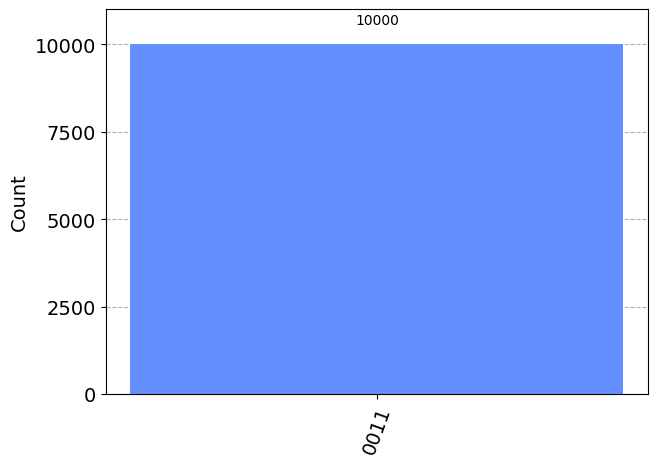

In [92]:
counts = runCircuit(circ)
plot_histogram(counts)

Always the same result, namely $0011$. This is exactly the vector $s$. 

The complexity is $O(1)$, thus it is faster than the classical algorithm, which is $O(n)$.

## Task 4.5

From the lecture we know
$$
\begin{align}
& H^{\otimes n}\left|x\right>=\frac{1}{\sqrt{2^n}}\sum_{y\in\{0,1\}^n}(-1)^{x\cdot y}\left|y\right>,\quad \left|x\right>=\left|x_1,\dots,x_n\right>\in\{0,1\}^n \\
\Rightarrow &H^{\otimes n}\left|0\right>=\frac{1}{\sqrt{2^n}}\sum_{y\in\{0,1\}^n}\left|y\right>
\end{align}
$$
We know that $f(x)=s\cdot x$ for some $s$ and thus we can use phase kickback $\left(U_f\left|x\right>\left|-\right>=(-1)^{f(x)}\left|x\right>\left|-\right>\right)$ and the above to deduce the string $s$
$$
\begin{align}
\left|s\right>\left|-\right>&=\left(H^{\otimes n}\otimes I\right)\left(\frac{1}{\sqrt{2^n}}\sum_{y\in\{0,1\}^n}(-1)^{s\cdot y}\left|y\right>\left|-\right>\right) \\
&=\left(H^{\otimes n}\otimes I\right)\left(\frac{1}{\sqrt{2^n}}\sum_{y\in\{0,1\}^n}(-1)^{f(y)}\left|y\right>\left|-\right>\right) \\
&=\left(H^{\otimes n}\otimes I\right)U_f\left(\frac{1}{\sqrt{2^n}}\sum_{y\in\{0,1\}^n}\left|y\right>\left|-\right>\right) \\
&=\left(H^{\otimes n}\otimes I\right)U_f\left(H^{\otimes n}\otimes I\right)\left|0\right>\left|-\right>
\end{align}
$$